# SMAI Assignment - 2

## Question - `4` : Gaussian Naïve Bayes

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

This question will have you working and experimenting with the Gaussian Naïve Bayes classifier. Initially, you will calculate the priors and the parameters for the Gaussians. Then, you will use the likelihoods to classify the test data. Please note that use of `sklearn` implementations is only for the final question in the Experiments section.

The dataset is simple and interesting, the [Wireless Indoor Localization Data Set](https://archive.ics.uci.edu/ml/datasets/Wireless+Indoor+Localization). An office has seven Wi-Fi routers and its signal strengths received from these routers categorize the location of the receiver (in one of four rooms). There are 7 attributes and a class label column that can take 4 values. The data is present in `wifiLocalization.txt`. It contains 2000 samples.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp  /content/drive/MyDrive/wifiLocalization.txt .

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# additional imports if necessary

### Estimate Gaussian parameters

Write a function to estimate the parameters of the Gaussian distribution.

In [ ]:
# your code here
# all features mean and variance
from scipy.stats import norm
class GaussianNb():
  def __init__(self,x,y,num_feature=7,num_class=4):
    self.x=x
    self.y=y
    self.mean_var=None
    self.num_feature=num_feature
    self.num_class=num_class

  def val_calc(self,l):
    m=np.mean(l)
    v=np.var(l)
    return m,v

  def fit(self):
    mean_l=[];var_l=[]
    print(set(self.y))
    main_l = [[] for i in range(self.num_class)]

    for row in self.x:
      main_l[row[-1]-1].append(row[:-1])  
    main_l=np.array(main_l)
    new_l=[]

    for i in range(len(main_l)):
      new_l.append(np.array(main_l[i]))
    mean_var=[[] for i in range(self.num_class)]

    for j,row in enumerate(new_l):
      for i in range(self.num_feature):
        col=row[:, i]
        m,v=self.val_calc(col)
        mean_var[j].append((m,v))
    self.mean_var=mean_var # mean and variance
    unique, counts = np.unique(self.y, return_counts=True)

    d=dict(zip(unique, counts)) # prior class calculation
    print(d)
    new_d={}
    for key in d.keys():
         new_d[key-1]=d[key]/sum(d.values())
    self.prob_count=new_d

  def ind_prob_calculator(self,mean,variance,x):
    const=1/np.sqrt(2*math.pi*variance)
    multiply=np.exp(-(np.square(x-mean)/(2*variance)))
    return np.multiply(const,multiply)

  def log_likelihood_calculator(self,mean,variance,x):
    const=1/np.sqrt(2*math.pi*variance)
    multiply=(-(np.square(x-mean)/(2*variance)))
    return np.log(const)+multiply
    
  def predict(self,feature_list):
    prob=-1.0;pred_class=-1
    for i,val in enumerate(self.mean_var):
      p=self.prob_count[i]
      for j,feature in enumerate(val):
        p*=self.ind_prob_calculator(feature[0],feature[1],feature_list[j])
      if(p>prob):
        prob=p
        pred_class=i+1
    return pred_class

  def predict_log(self,feature_list):
    prob=1000.0;pred_class=-1
    for i,val in enumerate(self.mean_var):
      p=np.log(self.prob_count[i])
      for j,feature in enumerate(val):
        p+=self.log_likelihood_calculator(feature[0],feature[1],feature_list[j])
      p*=-1
      if(p<prob):
        prob=p
        pred_class=i+1
    return pred_class

  def plot_graph(self,misclassified=None):
    print(len(self.mean_var[0]))
    for i in range(self.num_class):
      for j in range(self.num_feature):
        feature=self.x[:,j]      
        mean,var= self.mean_var[i][j]
        std=np.sqrt(var)
        plot_x=np.linspace(np.min(feature),np.max(feature))
        plt.plot(plot_x,norm.pdf(plot_x,mean,std))
        plt.title(f'Class {i},Feature {j}')
        plt.xlabel("Features")
        if misclassified is not None:
              pdf_2 = norm.pdf(misclassified[:, j], mean, std)
              plt.scatter(misclassified[:, j], pdf_2, color='green', marker='o', s=100)

        plt.show()
        plt.close()



### Calculate priors

Write a function to calculate the priors for each class.

In [ ]:
# your code


### Likelihood + Classification

Given a test sample, write a function to get the likelihoods for each class in the sample. Use the Gaussian parameters and priors calculated above. Then compute the likelihood that the sample belongs to each class and return the class with the highest likelihood.

What is a common problem with the likelihoods? How can you fix it? Redo the classification with the fixed likelihoods. (You can either write another function or modify the existing one after mentioning the reason for the change)

To improve likelihood we use log likelihood so that values dont loose and hence values will not go to 0. If not for numpy then there can be loss in probablities hence we use log likelihood to improve the accuracies however no changes can be seen here.

In [ ]:
# your code here
# your code here
df = pd.read_csv('/content/wifiLocalization.txt', sep='\t')

from sklearn.model_selection import train_test_split
x=df.iloc[:,:].values
y=df.iloc[:,-1:].values.flatten()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=41)
print(x_train)
model=GaussianNb(x_train,y_train) 
model.fit()


[[-65 -53 -60 ... -85 -83   1]
 [-69 -58 -46 ... -95 -93   4]
 [-61 -57 -54 ... -89 -88   4]
 ...
 [-41 -58 -48 ... -72 -76   2]
 [-56 -52 -51 ... -86 -91   3]
 [-48 -53 -54 ... -86 -83   3]]
{1, 2, 3, 4}
{1: 374, 2: 371, 3: 383, 4: 372}


<ipython-input-289-35b05851c32e>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  main_l=np.array(main_l)


### Load Data

The data has been loaded onto a Pandas DataFrame. Try to get an initial feel for the data by using functions like `describe()`, `info()`, or maybe try to plot the data to check for any patterns.

Note: To obtain the data from the UCI website, `wget` can be used followed by shuffling the samples using `shuf` and adding a header for easier reading via `pandas`. It is not necessary to view the data in a DataFrame and can be directly loaded onto NumPy as convenient.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def accuracy_function(x,y):
  pred_arr=[]
  for val in x:
    pred_arr.append(model.predict(val))
  return accuracy_score(pred_arr,y)
print(accuracy_function(x_test,y_test))

0.99


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
def accuracy_function(x,y):
  pred_arr=[]
  for val in x:
    pred_arr.append(model.predict_log(val))
  return accuracy_score(pred_arr,y)
print(accuracy_function(x_test,y_test))

0.99


### Splitting the Data

It is a good practice to split the data into training and test sets. This is to ensure that the model is not overfitting to the training data. The test set is used to evaluate the performance of the model on unseen data. The test set is not used to train the model in any way. The test set is only used to evaluate the performance of the model. You may use the `train_test_split` function from `sklearn.model_selection` to split the data into training and test sets.

It is a good idea to move your data to NumPy arrays now as it will make computing easier.

### Experiments

1. Estimate your model on the training data.
2. Plot the Gaussian probability density functions for each class after estimation.
3. Classify the test data using your model.
4. Pick a few samples from the test set that were misclassified and plot them along with the Gaussian probability density functions for each class. What do you observe?
5. Find if there are any features that are redundant. If so, remove them and repeat the experiments. How does the performance change?
6. Conversely, are there certain features that overpower the likelihood scores independently? Test this hypothesis empirically by only using hat/those feature(s) and repeating the experiments. How does the performance change?
7. Compare your results with the `scikit-learn` implementation. You can use the `GaussianNB` class from `sklearn.naive_bayes`. You can use the `score` function to get the accuracy of the model on the test set.
8. (Optional) Try other Naïve Bayes classifiers from [`sklearn.naive_bayes`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.naive_bayes) and compare the results.

In [ ]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/wifiLocalization.txt', sep='\t')

x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values.flatten()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 41)


In [ ]:
from sklearn.naive_bayes import GaussianNB

gb_scikit = GaussianNB()
gb_scikit.fit(x_train, y_train)
print("Naive Bayes score (Test): ",gb_scikit.score(x_test, y_test))
print("Naive Bayes score (Train): ",gb_scikit.score(x_train, y_train))


Naive Bayes score (Test):  0.99
Naive Bayes score (Train):  0.982


# Experiments

In [ ]:
# Performance on training data
print(accuracy_function(x_train,y_train))

0.982


7


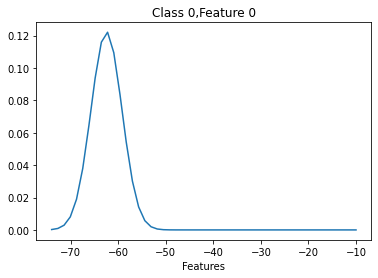

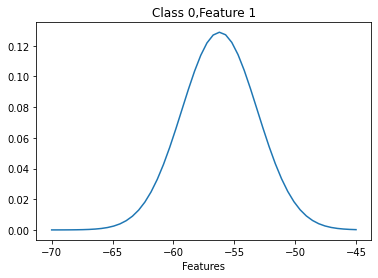

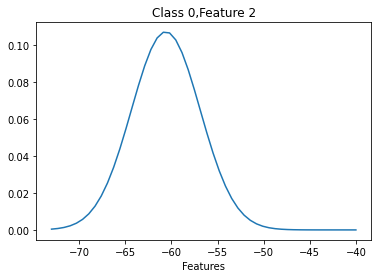

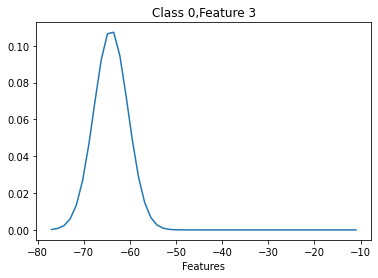

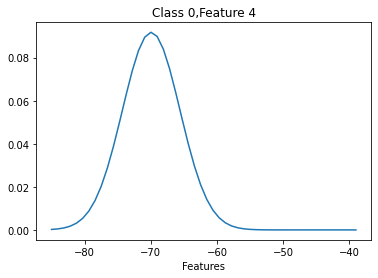

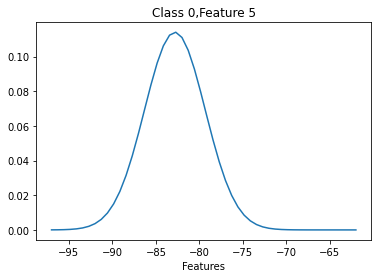

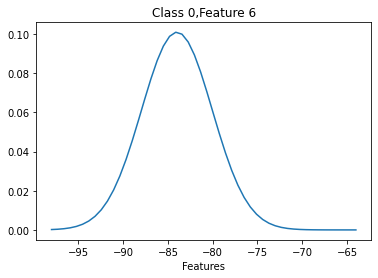

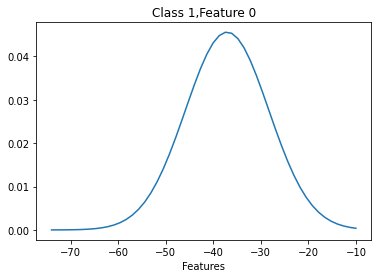

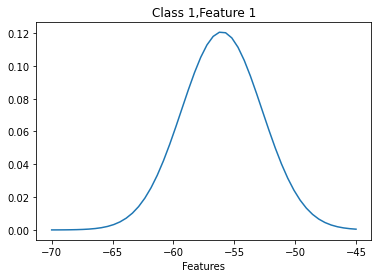

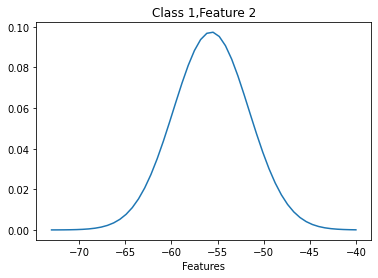

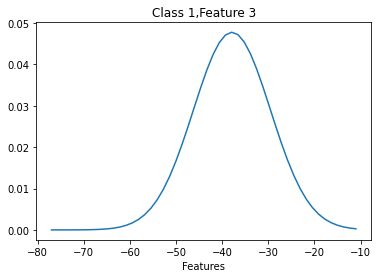

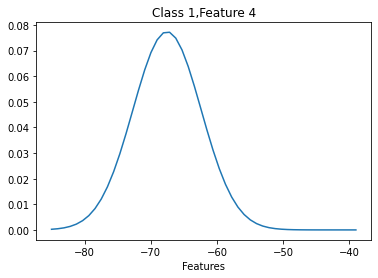

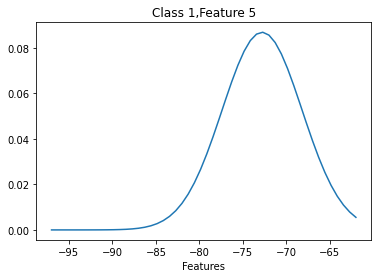

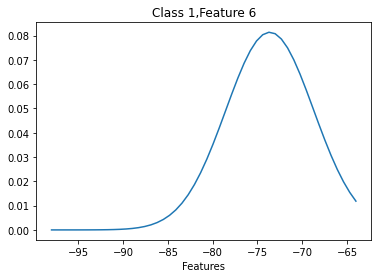

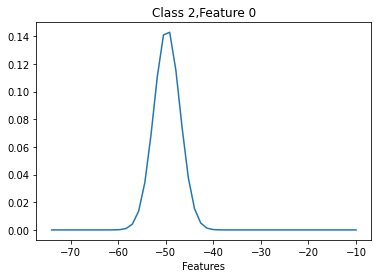

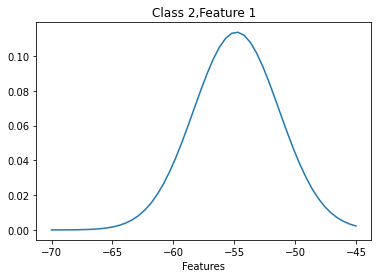

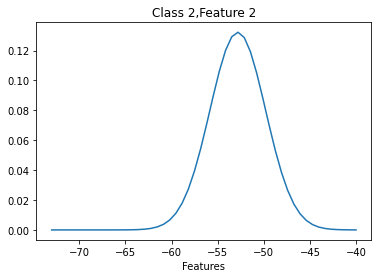

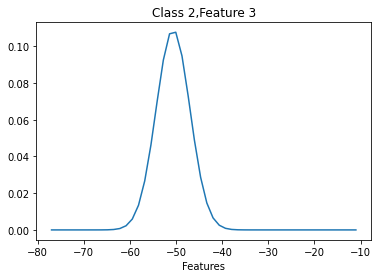

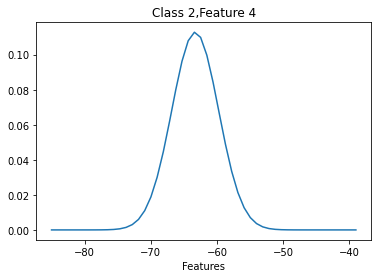

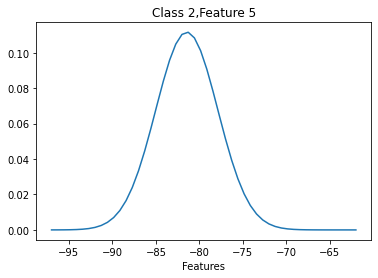

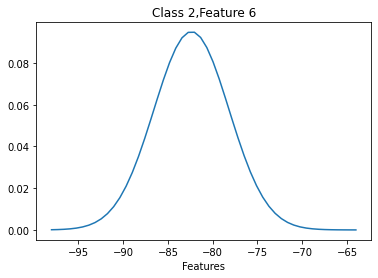

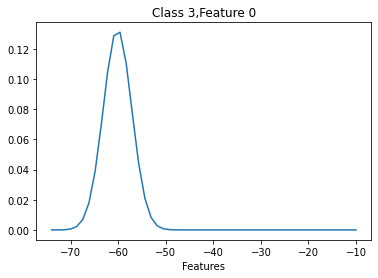

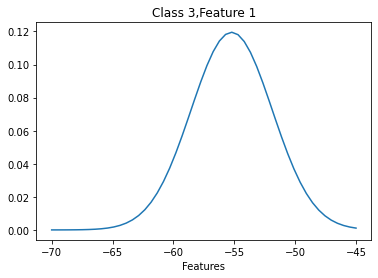

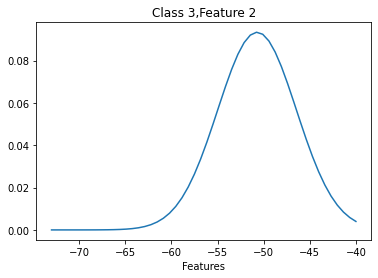

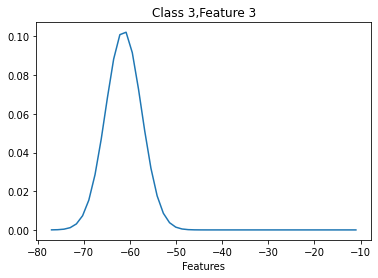

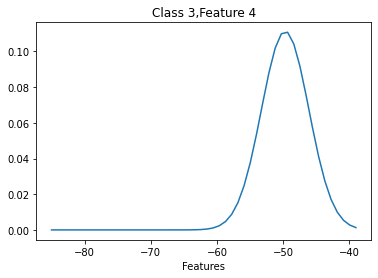

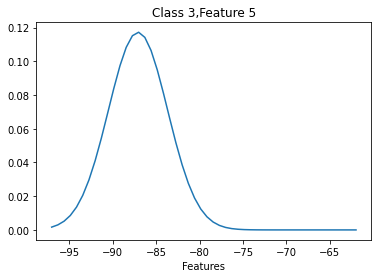

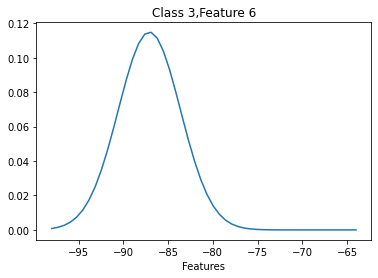

In [ ]:
model.plot_graph()


7


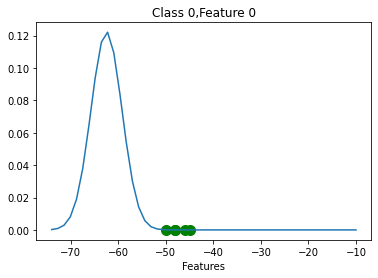

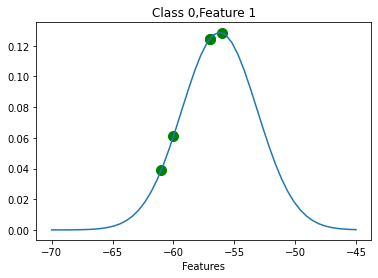

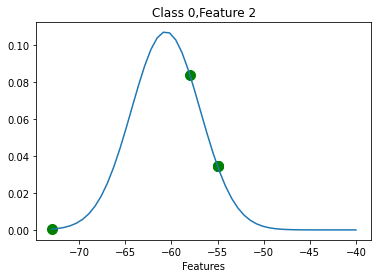

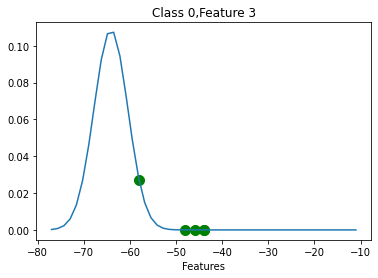

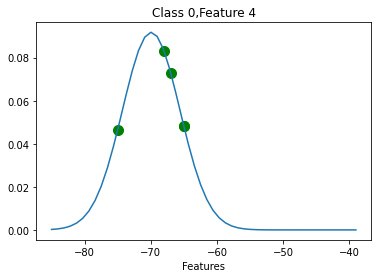

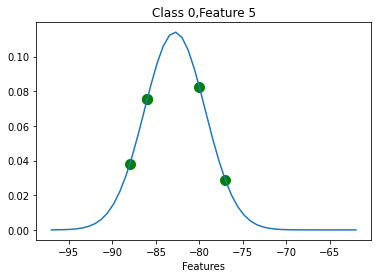

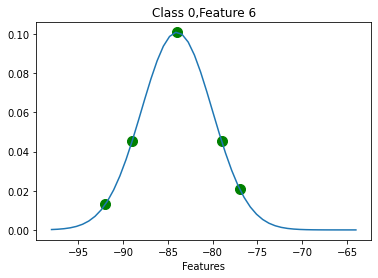

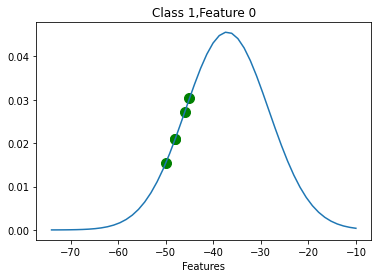

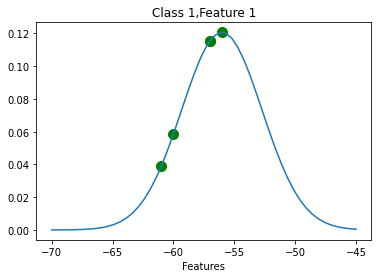

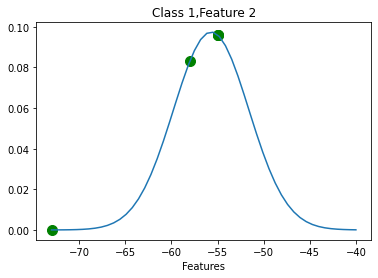

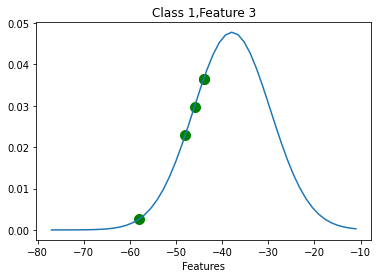

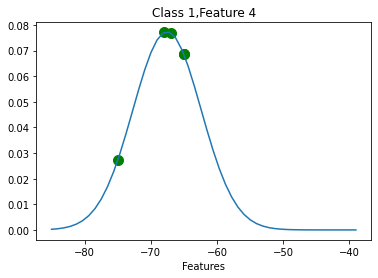

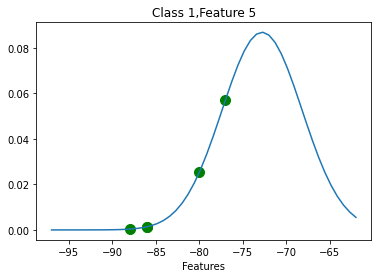

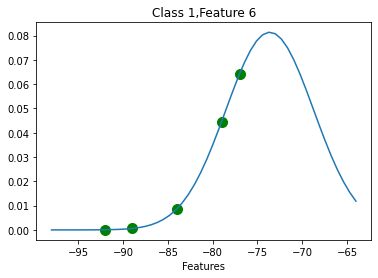

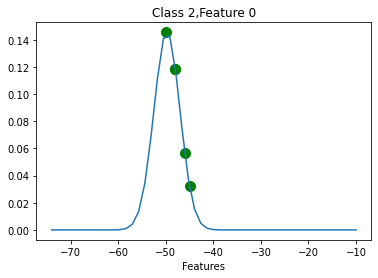

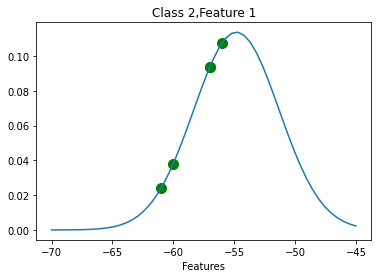

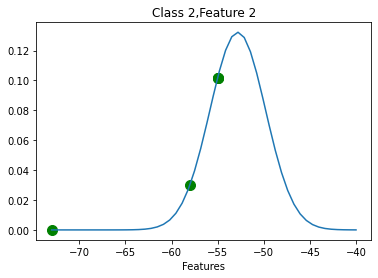

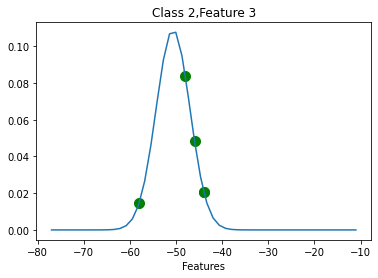

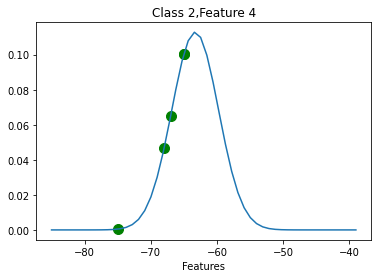

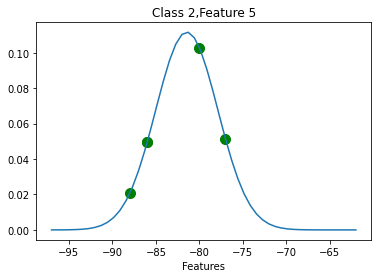

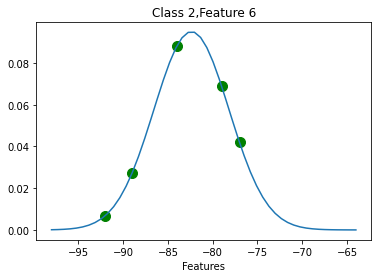

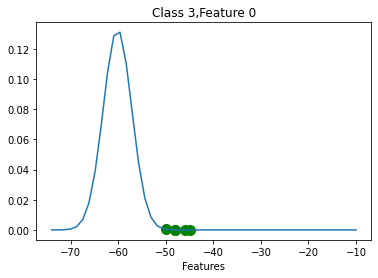

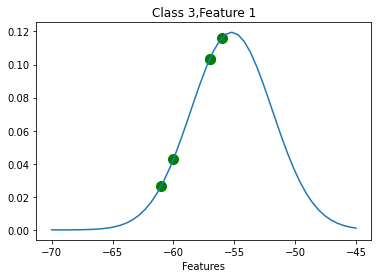

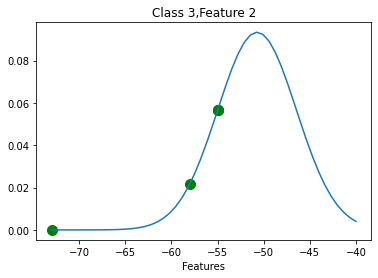

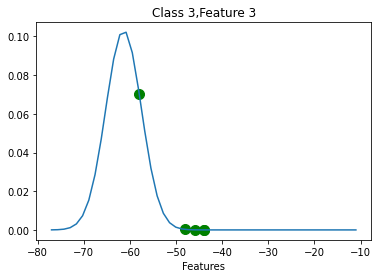

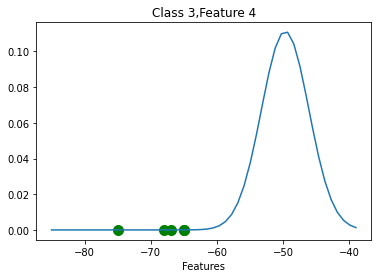

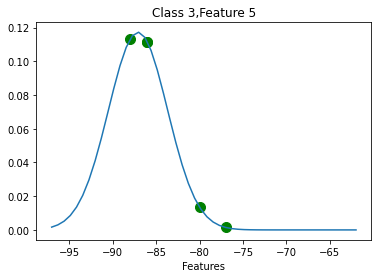

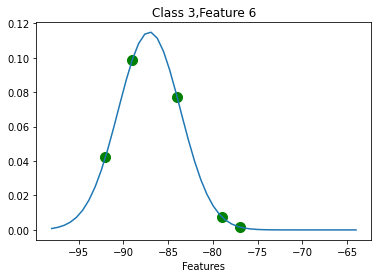

In [ ]:
pred_arr=[]
for val in x_test:
    pred_arr.append(model.predict(val))
x_wrong=x_test[y_test!=pred_arr]

model.plot_graph(x_wrong)


We can see that the missclassified points are misbehaving on points with higher weightage as we'll see later i.e. which have max information. Hence they are getting misclassified.


In [ ]:
pred_arr=np.array(pred_arr)
y_pred_wrong=pred_arr[pred_arr!=y_test]
y_actual_wrong=y_test[pred_arr!=y_test]
print(x_wrong.shape[0])

5


In [ ]:
for i in range(x_wrong.shape[0]):
  print(x_wrong[i])

[-46 -57 -55 -44 -65 -86 -77]
[-45 -57 -55 -48 -67 -77 -84]
[-48 -56 -55 -46 -65 -86 -79]
[-50 -60 -73 -58 -68 -88 -92]
[-48 -61 -58 -44 -75 -80 -89]


In [ ]:
new_df=df.copy()
new_df

,ws1,ws2,ws3,ws4,ws5,ws6,ws7,r
0,-47,-53,-54,-49,-63,-88,-85,3
1,-50,-57,-60,-43,-66,-77,-82,3
2,-44,-50,-57,-45,-61,-72,-67,2
3,-48,-59,-53,-45,-74,-81,-81,3
4,-60,-54,-59,-65,-66,-83,-84,1
...,...,...,...,...,...,...,...,...
1995,-47,-56,-54,-51,-63,-81,-86,3
1996,-46,-55,-48,-52,-62,-80,-79,3
1997,-36,-59,-55,-40,-65,-66,-69,2
1998,-60,-53,-52,-62,-50,-91,-88,4


In [ ]:
new_df = new_df.drop('r', axis=1)


          ws1       ws2       ws3       ws4       ws5       ws6       ws7
ws1  1.000000 -0.003298  0.050814  0.921025 -0.244932  0.718429  0.686955
ws2 -0.003298  1.000000  0.282211  0.014604  0.200469  0.074002  0.048336
ws3  0.050814  0.282211  1.000000  0.078292  0.618984 -0.091622 -0.073141
ws4  0.921025  0.014604  0.078292  1.000000 -0.236021  0.706039  0.673294
ws5 -0.244932  0.200469  0.618984 -0.236021  1.000000 -0.416049 -0.361621
ws6  0.718429  0.074002 -0.091622  0.706039 -0.416049  1.000000  0.723172
ws7  0.686955  0.048336 -0.073141  0.673294 -0.361621  0.723172  1.000000


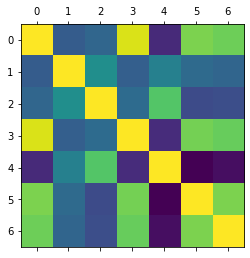

In [ ]:
print(new_df.corr())
plt.matshow(new_df.corr())
plt.show()
# hence 1,4,6,7 are correlated... 3&5 are correlated.

In [ ]:
new_df=df.copy()
new_df = new_df.drop(columns=['ws4', 'ws5','ws6','ws7'])
x_new=new_df.iloc[:,:].values
y_new=new_df.iloc[:,-1:].values.flatten()

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.25, random_state=41)
model_new=GaussianNb(x_new_train,y_new_train,num_feature=3) 
model_new.fit()
pred_arr=[]
for val in x_new_test:
    pred_arr.append(model_new.predict(val))
print(accuracy_score(pred_arr,y_new_test))


{1, 2, 3, 4}
{1: 374, 2: 371, 3: 383, 4: 372}
0.908


<ipython-input-289-35b05851c32e>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  main_l=np.array(main_l)


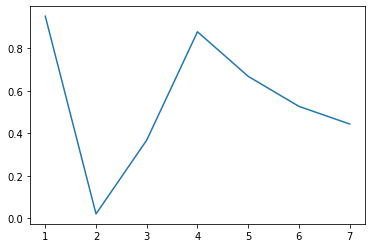

In [ ]:
from sklearn.feature_selection import mutual_info_classif
new_df=df.copy()
new_df = new_df.drop('r', axis=1)
info_classifier = mutual_info_classif(new_df, df['r'])
plot_x=np.arange(1,8)
plt.plot(plot_x,info_classifier)
plt.show()

In [ ]:
# As 1,4,6,7 are highly correlated and 3&5 are also so we keep only features 2,3,1
new_df=df.copy()
new_df = new_df.drop(columns=['ws1' ,'ws5','ws6','ws7'])
x_new=new_df.iloc[:,:].values
y_new=new_df.iloc[:,-1:].values.flatten()

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.25, random_state=41)
model_new=GaussianNb(x_new_train,y_new_train,num_feature=3) 
model_new.fit()
pred_arr=[]
for val in x_new_test:
    pred_arr.append(model_new.predict(val))
print("Test accuracy: ",accuracy_score(pred_arr,y_new_test))
pred_arr=[]
for val in x_new_train:
    pred_arr.append(model_new.predict(val))
print("Train accuracy: ",accuracy_score(pred_arr,y_new_train))



{1, 2, 3, 4}
{1: 374, 2: 371, 3: 383, 4: 372}
Test accuracy:  0.86
Train accuracy:  0.8733333333333333


<ipython-input-289-35b05851c32e>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  main_l=np.array(main_l)


In [ ]:
# 1 & 4 have the highest effect so taking those
new_df=df.copy()
new_df = new_df.drop(columns=['ws2','ws3' ,'ws5','ws6','ws7'])
x_new=new_df.iloc[:,:].values
y_new=new_df.iloc[:,-1:].values.flatten()

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.25, random_state=41)
model_new=GaussianNb(x_new_train,y_new_train,num_feature=2) 
model_new.fit()
pred_arr=[]
for val in x_new_test:
    pred_arr.append(model_new.predict(val))
print("Test accuracy: ",accuracy_score(pred_arr,y_new_test))
pred_arr=[]
for val in x_new_train:
    pred_arr.append(model_new.predict(val))
print("Train accuracy: ",accuracy_score(pred_arr,y_new_train))
# Good accuracy with only 2 features


{1, 2, 3, 4}
{1: 374, 2: 371, 3: 383, 4: 372}
Test accuracy:  0.81
Train accuracy:  0.7953333333333333


<ipython-input-289-35b05851c32e>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  main_l=np.array(main_l)


In [ ]:
# 2 & 7 have the poorest effect so taking those
new_df=df.copy()
new_df = new_df.drop(columns=['ws1','ws3' ,'ws5','ws6','ws4'])
x_new=new_df.iloc[:,:].values
y_new=new_df.iloc[:,-1:].values.flatten()

x_new_train, x_new_test, y_new_train, y_new_test = train_test_split(x_new, y_new, test_size=0.25, random_state=41)
model_new=GaussianNb(x_new_train,y_new_train,num_feature=2) 
model_new.fit()
pred_arr=[]
for val in x_new_test:
    pred_arr.append(model_new.predict(val))
print("Test accuracy: ",accuracy_score(pred_arr,y_new_test))
pred_arr=[]
for val in x_new_train:
    pred_arr.append(model_new.predict(val))
print("Train accuracy: ",accuracy_score(pred_arr,y_new_train))
# Poor accuracy


{1, 2, 3, 4}
{1: 374, 2: 371, 3: 383, 4: 372}
Test accuracy:  0.556


<ipython-input-289-35b05851c32e>:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  main_l=np.array(main_l)


Train accuracy:  0.556
